<a href="https://colab.research.google.com/github/PowerSH/ImageProcessing_and_Deep_Learning/blob/master/IP_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing with Colab

우선 이미지를 불러올 수 있도록 드라이브에서 가져올 수 있게, 권한을 받습니다.
링크를 클릭해서 권한을 입력한뒤, Enter를 눌러 드라이브 접근 권한을 얻습니다.

Colab Notebooks에서 ImageProcessing폴더를 생성후 폴더에 다음 파일들을 위치시켜줍니다.
*   Lenna_noise.jpg
*   Lenna.jpg
*   haarcascade_frontalface_default.xml




In [0]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/Colab Notebooks/ImageProcessing/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Reverse Color


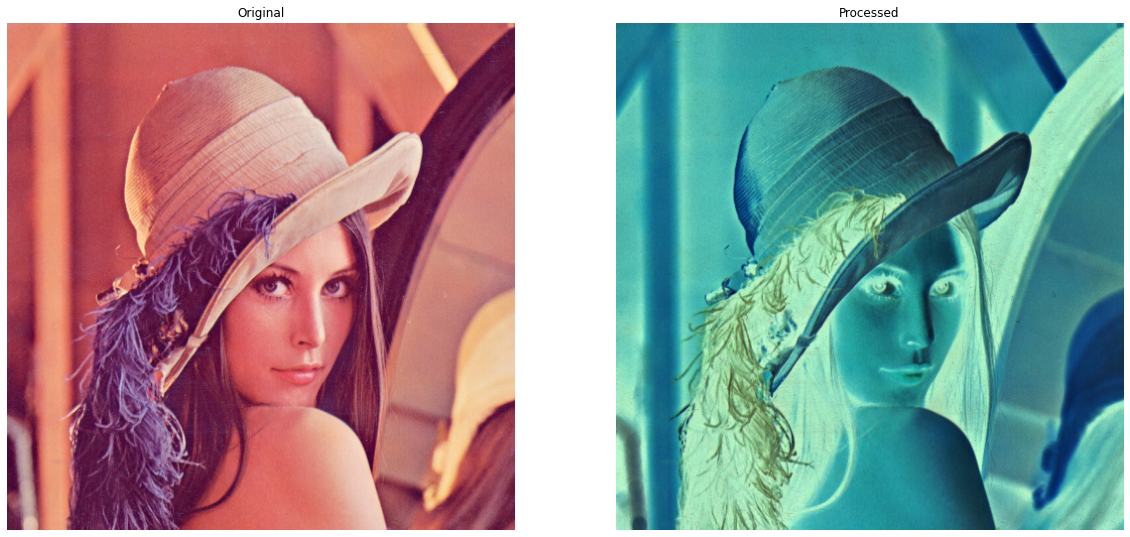

In [0]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt

origin = cv2.cvtColor(cv2.imread(path+"Lenna.jpg", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

processed = cv2.bitwise_not(origin)

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(origin)
ax1.set_title("Original")
ax1.axis("off")

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(processed)
ax2.set_title("Processed")
ax2.axis("off")

print("Reverse Color")
plt.show()

Binarization


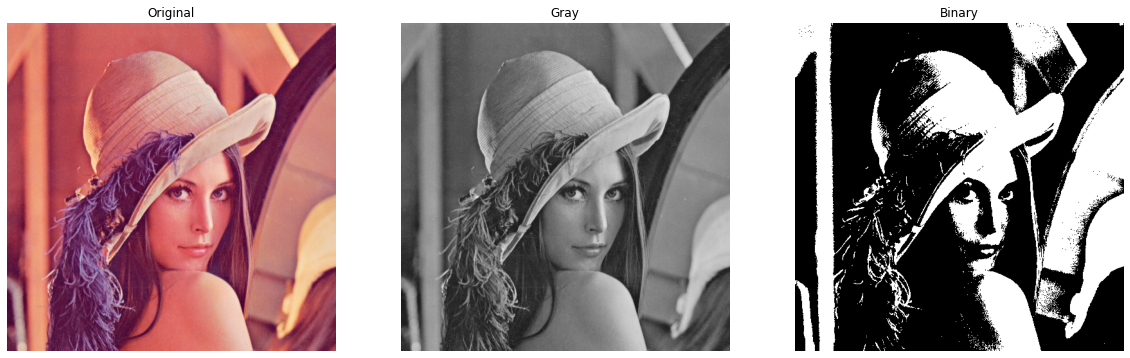

In [0]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt

origin = cv2.cvtColor(cv2.imread(path+"Lenna.jpg", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY), cv2.COLOR_BGR2RGB)

_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)


fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(origin)
ax1.set_title("Original")
ax1.axis("off")

ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(gray)
ax2.set_title("Gray")
ax2.axis("off")

ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(binary)
ax3.set_title("Binary")
ax3.axis("off")

print("Binarization")
plt.show()

Blurring


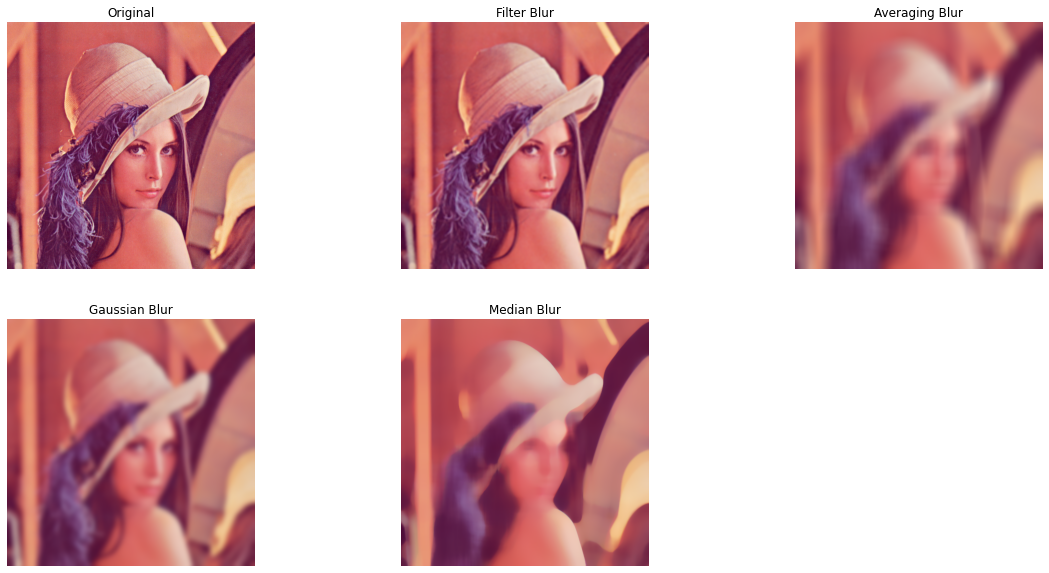

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

origin = cv2.cvtColor(cv2.imread(path + "Lenna.jpg"), cv2.COLOR_BGR2RGB)

# modify "val"
val = 33

kernel = np.ones((5, 5), np.float32)/25
blur = cv2.filter2D(origin, -1, kernel)
averaging = cv2.blur(origin, (val, val))
gaussian = cv2.GaussianBlur(origin, (val, val), 0)
median = cv2.medianBlur(origin, val)

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(origin)
ax1.set_title("Original")
ax1.axis("off")

ax2 = fig.add_subplot(2, 3, 2)
ax2.imshow(blur)
ax2.set_title("Filter Blur")
ax2.axis("off")

ax3 = fig.add_subplot(2, 3, 3)
ax3.imshow(averaging)
ax3.set_title("Averaging Blur")
ax3.axis("off")

ax4 = fig.add_subplot(2, 3, 4)
ax4.imshow(gaussian)
ax4.set_title("Gaussian Blur")
ax4.axis("off")

ax5 = fig.add_subplot(2, 3, 5)
ax5.imshow(median)
ax5.set_title("Median Blur")
ax5.axis("off")

print("Blurring")
plt.show()

(-0.5, 511.5, 511.5, -0.5)

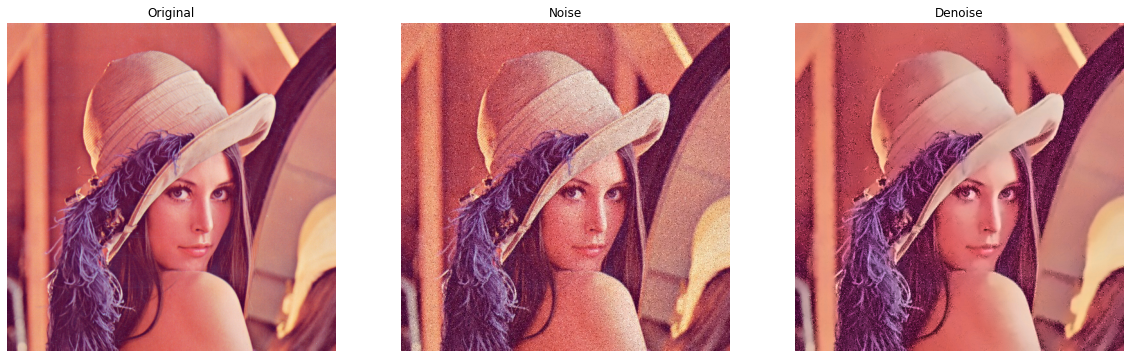

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

val = 64

origin = cv2.cvtColor(cv2.imread(path + "Lenna.jpg", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
noise = cv2.cvtColor(cv2.imread(path + "Lenna_noise.jpg", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
denoise = cv2.fastNlMeansDenoisingColored(noise, None, 10, 10, 7, 21)

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(origin)
ax1.set_title("Original")
ax1.axis("off")

ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(noise)
ax2.set_title("Noise")
ax2.axis("off")

ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(denoise)
ax3.set_title("Denoise")
ax3.axis("off")

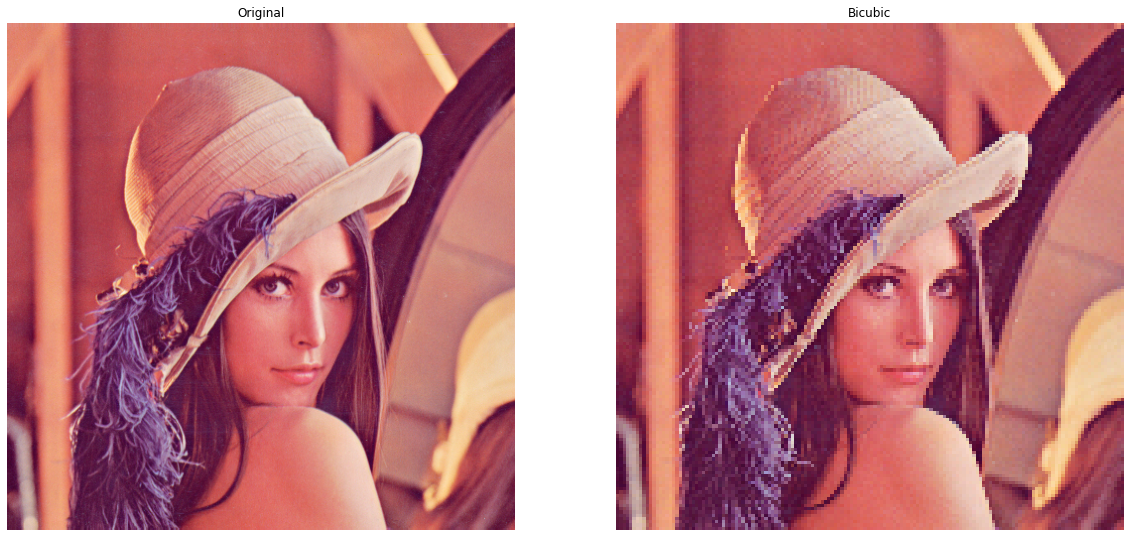

In [0]:
import cv2
from matplotlib import pyplot as plt

origin = cv2.cvtColor(cv2.imread(path + "Lenna.jpg", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

bicubic = cv2.resize(origin, dsize=(0, 0), fx=0.3, fy=0.3, interpolation=cv2.INTER_CUBIC)

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(origin)
ax1.set_title("Original")
ax1.axis("off")

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(bicubic)
ax2.set_title("Bicubic")
ax2.axis("off")

print("Interpolation")
plt.show()

Edge Detecting


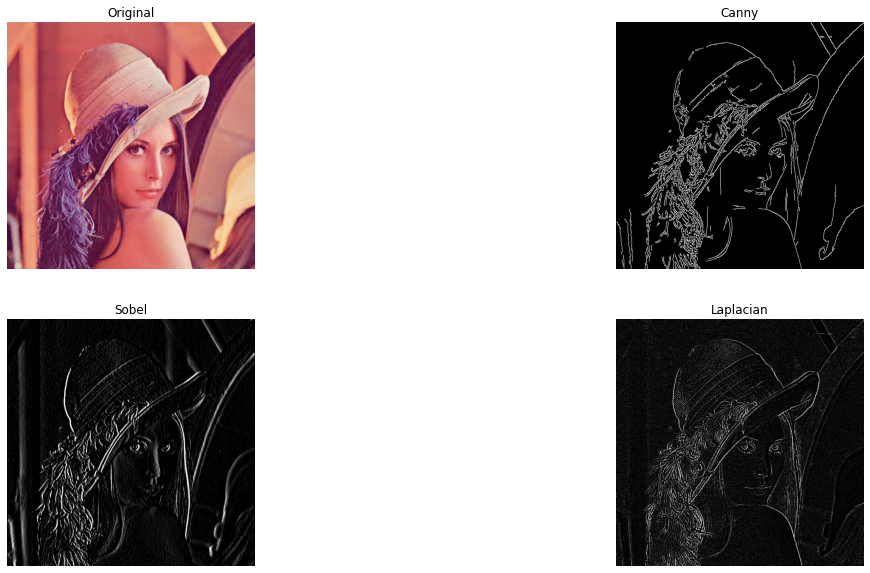

In [0]:
import cv2
from matplotlib import pyplot as plt

origin = cv2.cvtColor(cv2.imread(path + "Lenna.jpg", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY), cv2.COLOR_BGR2RGB)

canny = cv2.cvtColor(cv2.Canny(origin, 127, 255), cv2.COLOR_BGR2RGB)
sobel = cv2.Sobel(gray, cv2.CV_8U, 1, 0, 3)
laplacian = cv2.Laplacian(gray, cv2.CV_8U, ksize=3)

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(origin)
ax1.set_title("Original")
ax1.axis("off")

ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(canny)
ax2.set_title("Canny")
ax2.axis("off")

ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(sobel)
ax3.set_title("Sobel")
ax3.axis("off")

ax4 = fig.add_subplot(2, 2, 4)
ax4.imshow(laplacian)
ax4.set_title("Laplacian")
ax4.axis("off")

print("Edge Detecting")
plt.show()

Edge Detecting


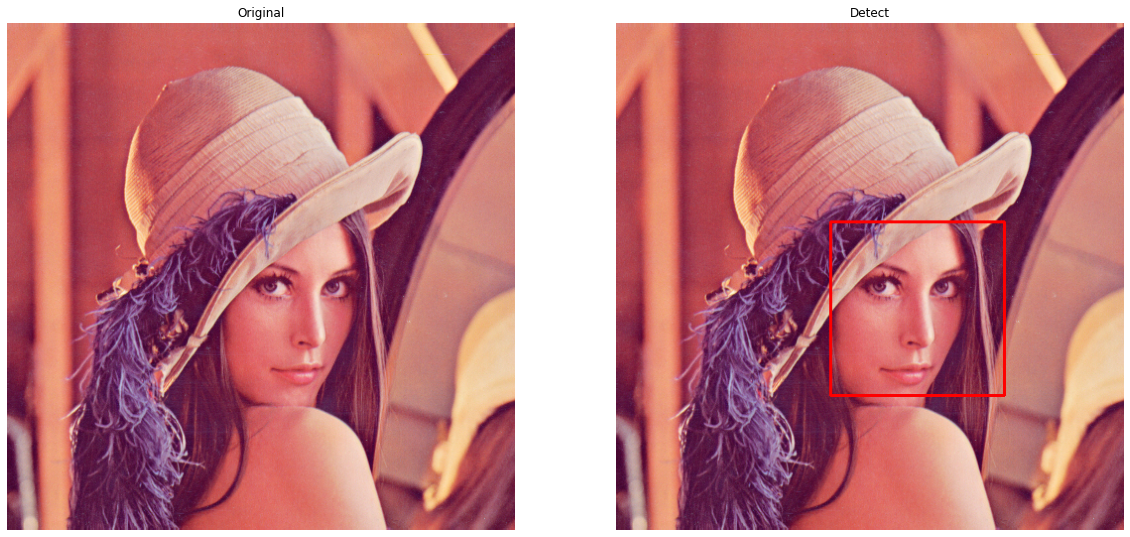

In [0]:
import cv2
from matplotlib import pyplot as plt
# https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml

origin = cv2.cvtColor(cv2.imread(path + "Lenna.jpg", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
detect = cv2.cvtColor(cv2.imread(path + "Lenna.jpg", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(path + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)


for (x,y,w,h) in faces:
  cv2.rectangle(detect, (x, y), (x+w, y+h), (255, 0, 0), 2)

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(origin)
ax1.set_title("Original")
ax1.axis("off")

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(detect)
ax2.set_title("Detect")
ax2.axis("off")

print("Face Detecting")
plt.show()